Data Visualization Design Jan 2024 Project
# **Market Pulse: Unveiling Product Performance in E-commerce**

## Team 11 - DataDynamos

### **Team Members:**
- Anushka Aggarwal (21f2000407) (Team Leader)
- Sanket Gaikwad (21f1007096)
- Ajeet Kumar  (21f1006807)
- Harsh Bardhan (21f1004807)

## Import Required Libraries

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Preprocessing

In [276]:
# reading the data
df = pd.read_csv('Jan-24 project.csv')

In [277]:
# printing the columns
df.columns

Index(['product_id', 'product_title', 'category', 'product_subcategory',
       'brand', 'selling_price', 'original_price', 'product_type',
       'product_rating', 'product_description', 'availability_status',
       'customer_reviews_count', 'seasonal_indicator', 'promotion_indicator',
       'shipping_weight', 'bundle_indicator', 'customer_demographics',
       'discount_per'],
      dtype='object')

In [278]:
# printing the first 5 rows
df.head()

product_id                                      product_title  \
0           1             Garlic Oil - Vegetarian Capsule 500 mg   
1           2                              Water Bottle - Orange   
2           3                     Brass Angle Deep - Plain, No.2   
3           4  Cereal Flip Lid Container/Storage Jar - Assort...   
4           5                 Creme Soft Soap - For Hands & Body   

                 category    product_subcategory             brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda   
1  Kitchen, Garden & Pets  Storage & Accessories        Mastercook   
2    Cleaning & Household            Pooja Needs               Trm   
3    Cleaning & Household   Bins & Bathroom Ware            Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash             Nivea   

   selling_price  original_price              product_type  product_rating  \
0          220.0           220.0          Hair Oil & Serum             4.1   
1          180.0           180.0    Water & Fridge Bottles             2.3   
2          119.0           250.0           Lamp & Lamp Oil             3.4   
3          149.0           176.0  Laundry, Storage Baskets             3.7   
4          162.0           162.0      Bathing Bars & Soaps             4.4   

                                 product_description availability_status  \
0  This Product contains Garlic Oil that is known...            In Stock   
1  Each product is microwave safe (without lid), ...            In Stock   
2  A perfect gift for all occasions, be it your m...            In Stock   
3  Multipurpose container with an attractive desi...            In Stock   
4  Nivea Creme Soft Soap gives your skin the best...            In Stock   

   customer_reviews_count seasonal_indicator promotion_indicator  \
0                       7             Spring                 Yes   
1                      54             Winter                  No   
2                      31             Winter                  No   
3                      49             Spring                  No   
4                      74             Winter                 Yes   

   shipping_weight bundle_indicator customer_demographics  discount_per  
0         0.658145       Individual                Female      0.000000  
1         4.734585           Bundle                Female      0.000000  
2         2.024140           Bundle                Female     52.400000  
3         3.869239       Individual                 Other     15.340909  
4         0.812489       Individual                  Male      0.000000

In [279]:
# listing the unique values in the product_type column
df.product_type.unique().tolist()

['Hair Oil & Serum',
 'Water & Fridge Bottles',
 'Lamp & Lamp Oil',
 'Laundry, Storage Baskets',
 'Bathing Bars & Soaps',
 'Disinfectant Spray & Cleaners',
 'Face Care',
 'Hand Wash & Sanitizers',
 'Shampoo & Conditioner',
 'Utensil Scrub-Pad, Glove',
 'Flours & Pre-Mixes',
 'Luxury Chocolates, Gifts',
 'Floor & Other Cleaners',
 'Mosquito Repellent',
 'Soap Cases & Dispensers',
 'Aromatherapy',
 'Roasted Seeds & Nuts',
 'Tofu',
 'Tools & Accessories',
 'Imported Noodles',
 'Other Dry Fruits',
 'Gourmet Tea & Tea Bags',
 'Choppers & Graters',
 'Casserole',
 'Granola & Cereal Bars',
 'Frozen Veg Snacks',
 'Lip Care',
 'Juices',
 'Bakery Biscuits, Cookies',
 "Men's Deodorants",
 'Green Tea',
 'Containers Sets',
 'Whole Spices',
 'Blended Masalas',
 'Chocolates',
 'Eau De Toilette',
 'Cookies, Biscotti, Wafer',
 'Steel Lunch Boxes',
 'Olive, Jalapeno, Gherkin',
 'Organic Rice, Other Rice',
 'Shaving Care',
 'Imported Cleaners',
 'Thai & Asian Sauces',
 'Chutney Powder',
 'Cooking Pastes',

In [280]:
# counting the number of unique values in the each column
unique_counts = df.nunique()
print(unique_counts)

product_id                27555
product_title             23540
category                     11
product_subcategory          90
brand                      2313
selling_price              3256
original_price             1348
product_type                426
product_rating               40
product_description       21941
availability_status           1
customer_reviews_count      101
seasonal_indicator            4
promotion_indicator           2
shipping_weight           27555
bundle_indicator              2
customer_demographics         3
discount_per               3564
dtype: int64


### Duplicates

In [281]:
# All products have unique ids, product titles are duplicated but they have other different features.
# groupbuy

### Handling missing values

In [282]:
# identifying the missing values
df.isnull().sum()

product_id                   0
product_title                1
category                     0
product_subcategory          0
brand                        1
selling_price                0
original_price               0
product_type                 0
product_rating            8626
product_description        115
availability_status          0
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
discount_per                 0
dtype: int64

In [283]:
# There are many missing values in product_ratining column. We can not drop them as customer_reviews_count is still available.

In [284]:
# filling the missing values
df['product_description'] = df['product_description'].fillna('not available')
df.isnull().sum()

product_id                   0
product_title                1
category                     0
product_subcategory          0
brand                        1
selling_price                0
original_price               0
product_type                 0
product_rating            8626
product_description          0
availability_status          0
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
discount_per                 0
dtype: int64

### Outliers Vizualization

<Axes: xlabel='selling_price', ylabel='category'>

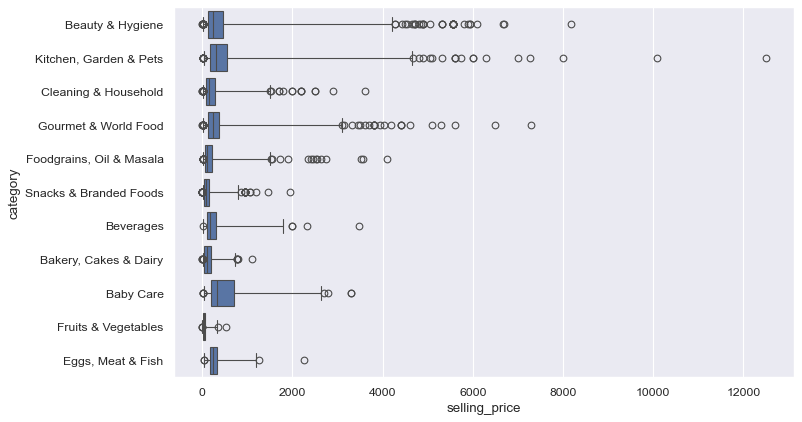

In [285]:
# visualizing the outlies in the selling_price column on the basis of category
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='selling_price',  data=df,whis=[0.5, 99.5], y = "category")

<Axes: xlabel='original_price', ylabel='category'>

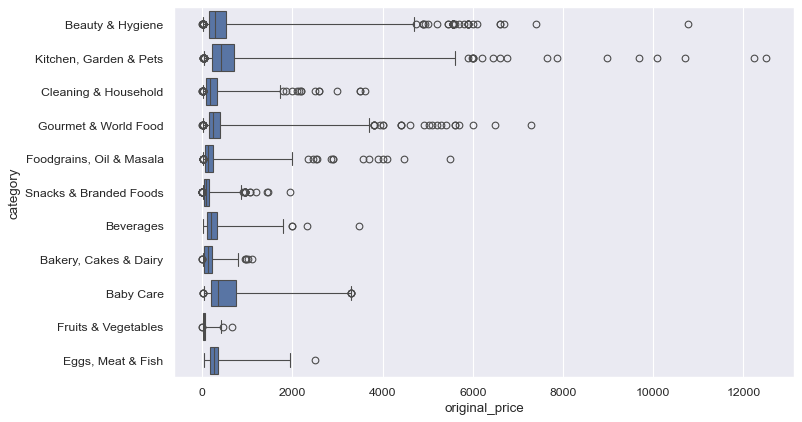

In [286]:
# visualizing the outlies in the original_price column on the basis of category
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='original_price',  data=df,whis=[0.5, 99.5], y = "category")

<Axes: xlabel='customer_reviews_count', ylabel='category'>

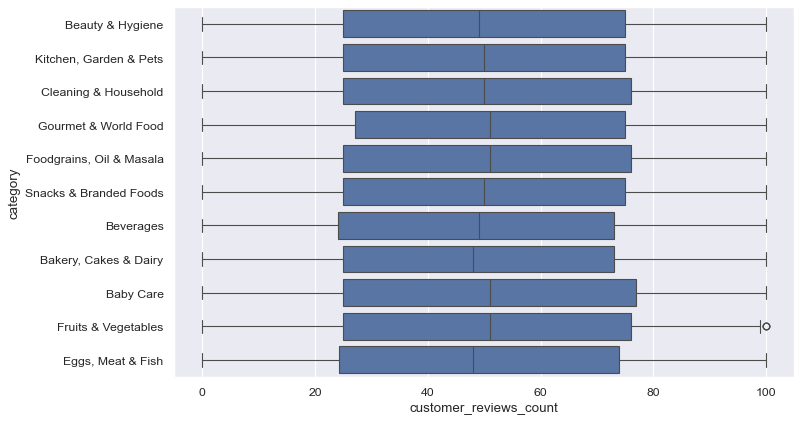

In [287]:
# visualizing the outlies in the customer_reviews_count column on the basis of category
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='customer_reviews_count',  data=df,whis=[0.5, 99.5], y = "category")

<Axes: xlabel='product_rating', ylabel='category'>

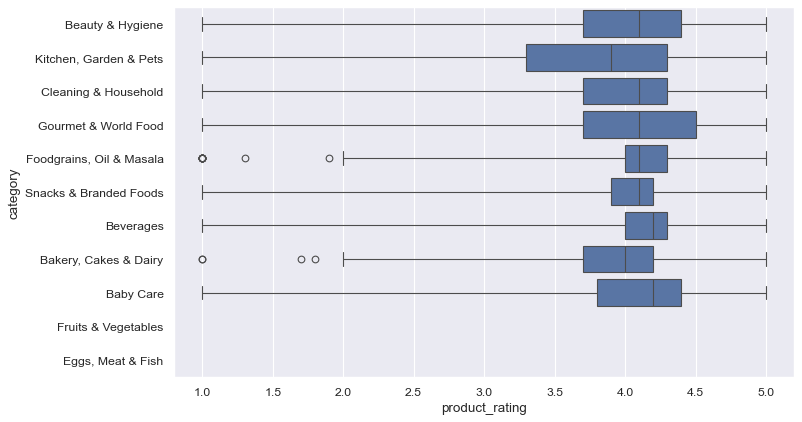

In [288]:
# visualizing the outlies in the product_rating column on the basis of category
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='product_rating',  data=df,whis=[0.5, 99.5], y = "category")

<Axes: xlabel='shipping_weight', ylabel='category'>

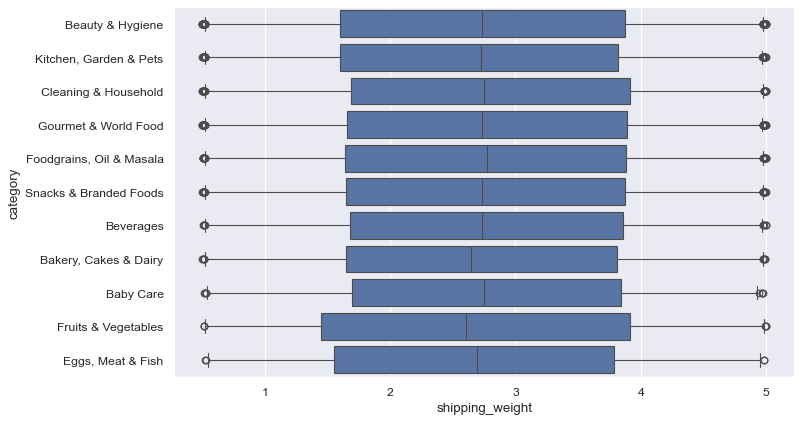

In [289]:
# visualizing the outlies in the shipping_weight column on the basis of category
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='shipping_weight',  data=df,whis=[0.5, 99.5], y = "category")

### Standardize column and data types for consistency

In [290]:
# basic statistics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              27555 non-null  int64  
 1   product_title           27554 non-null  object 
 2   category                27555 non-null  object 
 3   product_subcategory     27555 non-null  object 
 4   brand                   27554 non-null  object 
 5   selling_price           27555 non-null  float64
 6   original_price          27555 non-null  float64
 7   product_type            27555 non-null  object 
 8   product_rating          18929 non-null  float64
 9   product_description     27555 non-null  object 
 10  availability_status     27555 non-null  object 
 11  customer_reviews_count  27555 non-null  int64  
 12  seasonal_indicator      27555 non-null  object 
 13  promotion_indicator     27555 non-null  object 
 14  shipping_weight         27555 non-null

In [291]:
# All data types are correct. Standardization is not required at this point. We can do that if required for particular visualization.

## Data Exploration

In [292]:
#Descriptive Statistics
df.describe()

product_id  selling_price  original_price  product_rating  \
count  27555.00000   27555.000000    27555.000000    18929.000000   
mean   13778.00000     322.514808      382.056664        3.943410   
std     7954.58767     486.263116      581.730717        0.739063   
min        1.00000       2.450000        3.000000        1.000000   
25%     6889.50000      95.000000      100.000000        3.700000   
50%    13778.00000     190.000000      220.000000        4.100000   
75%    20666.50000     359.000000      425.000000        4.300000   
max    27555.00000   12500.000000    12500.000000        5.000000   

       customer_reviews_count  shipping_weight  discount_per  
count            27555.000000     27555.000000  27555.000000  
mean                49.962874         2.742169     11.824861  
std                 29.015473         1.298855     14.624461  
min                  0.000000         0.500019      0.000000  
25%                 25.000000         1.622361      0.000000  
50%                 50.000000         2.731724      5.000000  
75%                 75.000000         3.871023     20.000000  
max                100.000000         4.999455     83.666667

<Axes: xlabel='category', ylabel='count'>

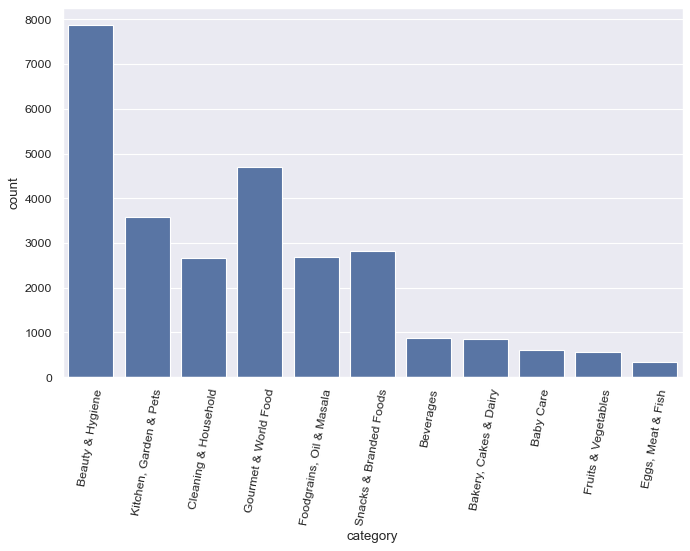

In [293]:
# counting the number of products in each category
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=80)
sns.countplot(x='category', data=df)

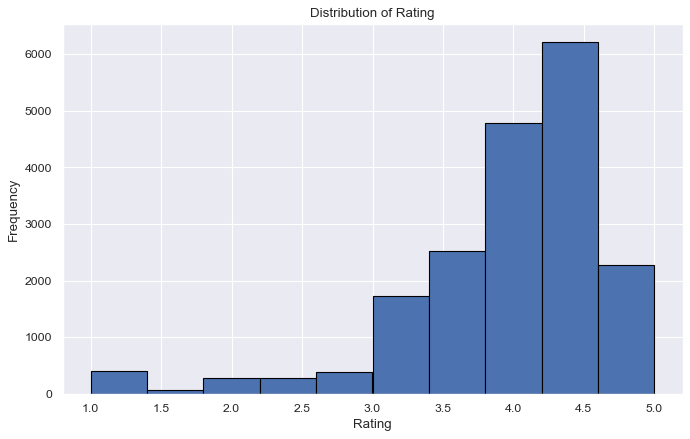

In [294]:
# Distibution of Rating of products

plt.figure(figsize=(10, 6), dpi=80)
plt.hist(df['product_rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')
plt.show()


<Figure size 800x480 with 0 Axes>

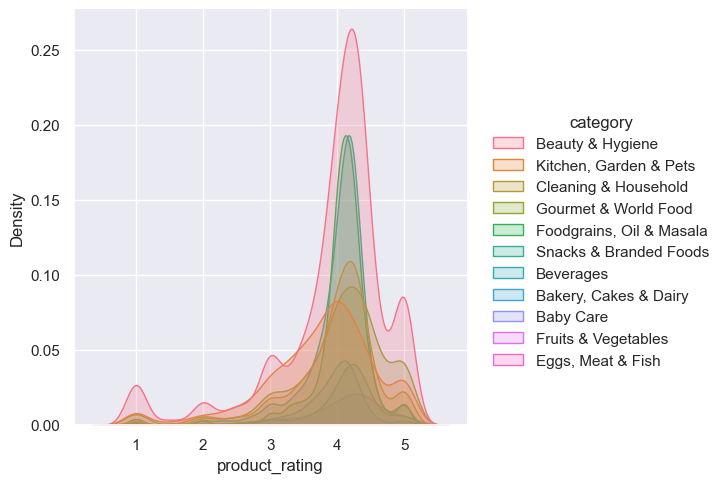

In [295]:
# Density plot of product rating on the basis of category
plt.figure(figsize=(10, 6), dpi=80)
sns.displot(df, x="product_rating", hue="category", kind="kde", fill=True,warn_singular=False)

<Axes: xlabel='category', ylabel='selling_price'>

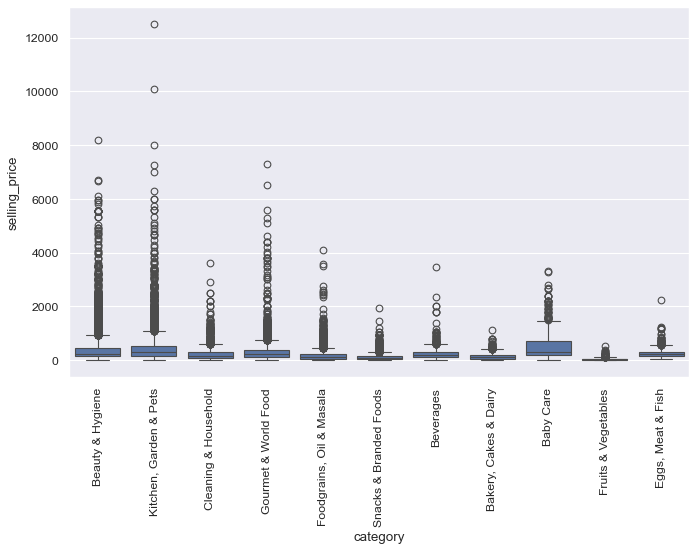

In [296]:
# outlies in the Selling price column on the basis of category
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=90)
sns.boxplot(data=df, x="category", y="selling_price")

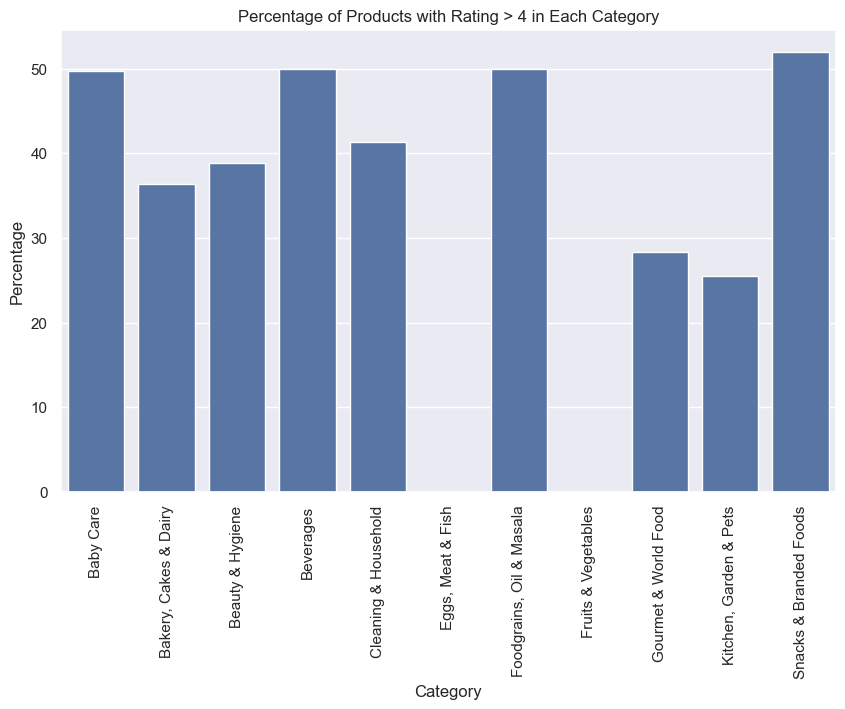

In [297]:
# Products with rating > 4 in each category

# Total products in each category
products_count_per_category = df['category'].value_counts()

# Total products with rating > 4 in each category
products_with_more_than_4_reviews = df[df['product_rating'] > 4]['category'].value_counts()

# Calculate percentage
percentage_per_category = (products_with_more_than_4_reviews / products_count_per_category) * 100

# Plotting the percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_per_category.index, y=percentage_per_category.values)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Products with Rating > 4 in Each Category')
plt.xticks(rotation=90)
plt.show()


In [298]:
# No rating available for two of the categories. We can not calculate the percentage of products with rating > 4 in these categories.

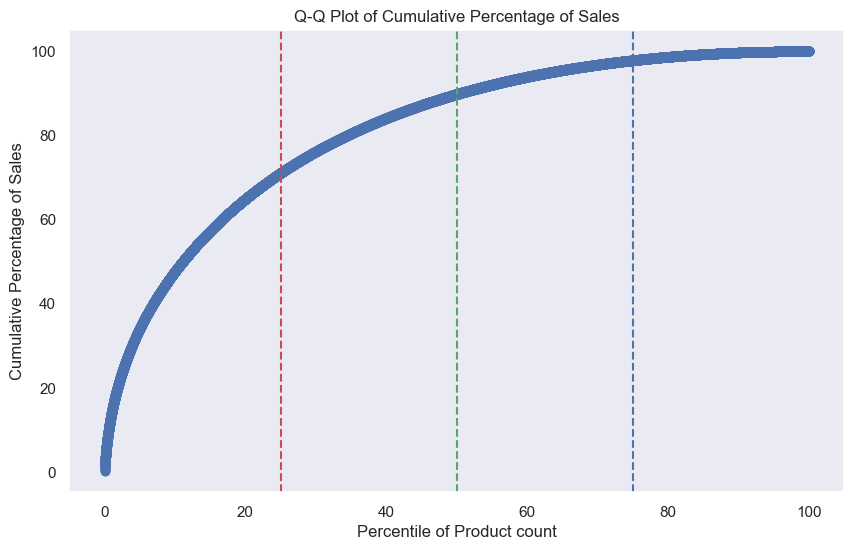

In [299]:
# qq plot of cumulative percentage of sales

# Step 1: Calculate sales for each product
df['sales'] = df['customer_reviews_count'] * df['selling_price']

# Step 2: Sort products based on sales in descending order
sorted_df = df.sort_values(by='sales', ascending=False)

# Step 3: Calculate cumulative sales
sorted_df['cumulative_sales'] = sorted_df['sales'].cumsum()

# Step 4: Calculate cumulative percentage of sales
total_sales = sorted_df['sales'].sum()
sorted_df['cumulative_percentage'] = (sorted_df['cumulative_sales'] / total_sales) * 100

# Step 5: Plot the Q-Q plot
quantiles = np.arange(1, len(sorted_df) + 1) / len(sorted_df) * 100

plt.figure(figsize=(10, 6))
plt.plot(quantiles, sorted_df['cumulative_percentage'], marker='o', linestyle='-')

# Add vertical lines at 25th, 50th, and 75th percentiles
plt.axvline(25, color='r', linestyle='--', label='25th Percentile')
plt.axvline(50, color='g', linestyle='--', label='50th Percentile (Median)')
plt.axvline(75, color='b', linestyle='--', label='75th Percentile')
plt.xlabel('Percentile of Product count')
plt.ylabel('Cumulative Percentage of Sales')
plt.title('Q-Q Plot of Cumulative Percentage of Sales')
plt.grid(False)
plt.show()


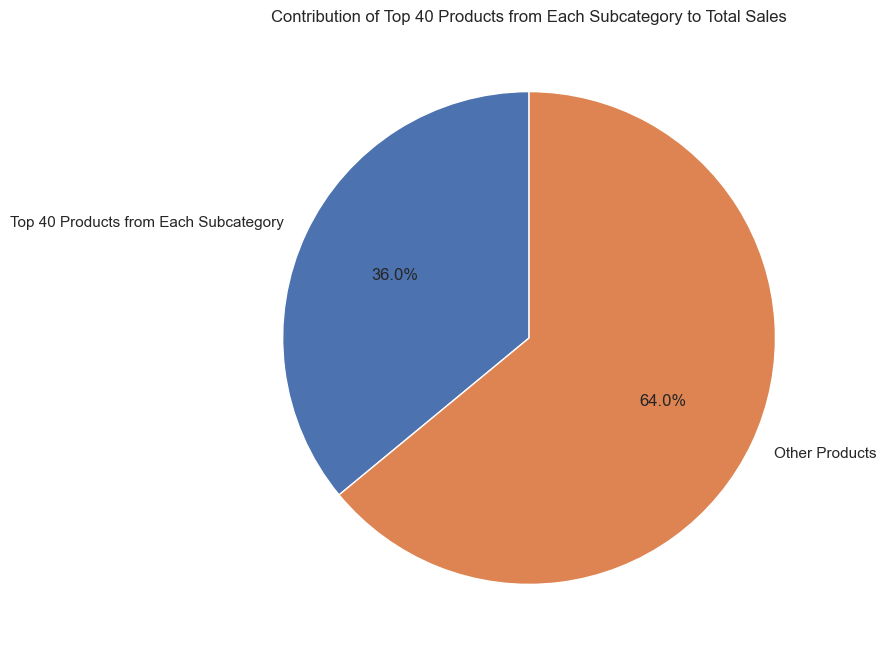

In [300]:
# Contribution of top 40 products from each subcategory to total sales

# Step 1: Group the DataFrame by subcategory
grouped_df = df.groupby('product_subcategory')

# Initialize variables to store total sales and total sales of top 10 products
total_sales_all = df['sales'].sum()
total_sales_top_10 = 0

# Iterate over each subcategory group
for subcategory, sub_df in grouped_df:
    # Step 2: Sort products based on sales in descending order
    sorted_df = sub_df.sort_values(by='sales', ascending=False)
    
    # Step 3: Select the top 10 products
    top_10_df = sorted_df.head(40)
    
    # Step 4: Calculate total sales for the top 10 products from each subcategory
    total_sales_top_10 += top_10_df['sales'].sum()

# Step 5: Calculate contribution of top 10 products from each subcategory to total sales
contribution = (total_sales_top_10 / total_sales_all) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie([contribution, 100 - contribution], labels=['Top 40 Products from Each Subcategory', 'Other Products'], autopct='%1.1f%%', startangle=90)
plt.title('Contribution of Top 40 Products from Each Subcategory to Total Sales')
plt.show()


In [301]:
# fig = px.sunburst(df, path=['category','product_subcategory', "product_type", "brand"], values='customer_reviews_count', color='category')
# fig.update_layout(width=800, height=600)
# fig.show()

Analysis on subcategory Level

## 1. Foodgrains, Oil & Masala

In [302]:
# data for the category 'Foodgrains, Oil & Masala' in a separate dataframe
df_FOM = df.loc[df['category'] == 'Foodgrains, Oil & Masala'].copy()

<Axes: xlabel='product_subcategory', ylabel='count'>

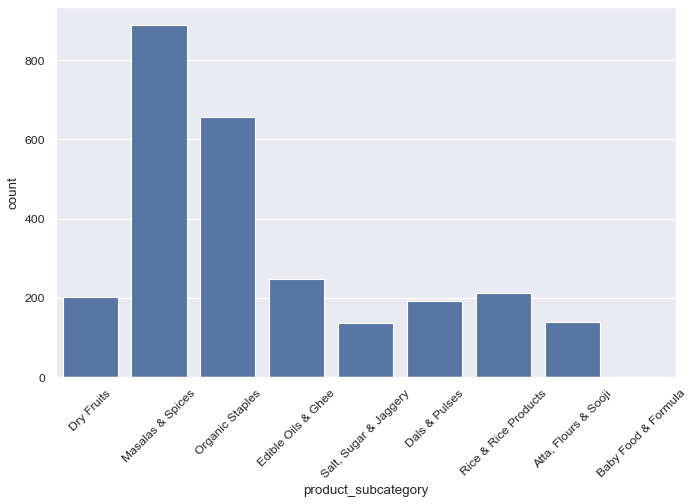

In [303]:
# counting the number of products in each subcategory of the category 'Foodgrains, Oil & Masala'
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=45)
sns.countplot(x='product_subcategory', data=df_FOM)

<Axes: xlabel='product_subcategory', ylabel='selling_price'>

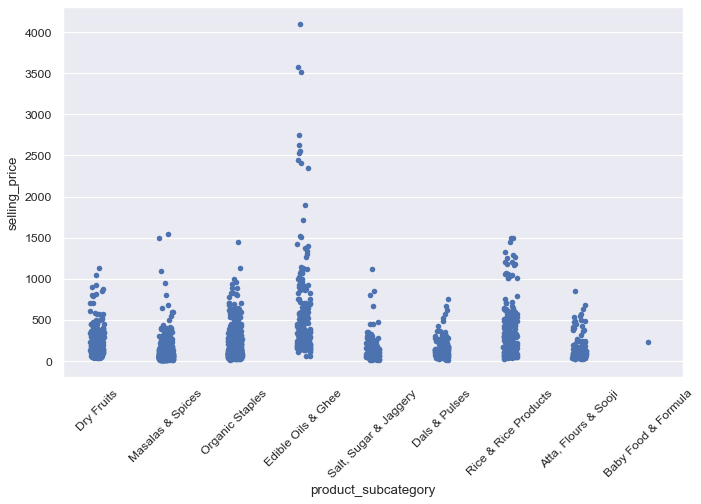

In [304]:
# visualizing the selling price of products against each subcategory of the category 'Foodgrains, Oil & Masala'
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=45)
sns.stripplot(data=df_FOM, x="product_subcategory", y="selling_price")

Week 2 objectives:
- Evaluate product performance metrics such as sales, ratings, and pricing.
-  Identify trends and patterns within product categories to uncover high-demand items and
growth opportunities.
- Analyze brand performance to understand brand loyalty and market share.
- Explore consumer ratings to gain insights into preferences and satisfaction levels.


sales

In [305]:
# For each caterogy we will vizualize highest selling items against their rating and price
# Assuming ales is proptional to customer reviews count

top_10_products = df_FOM.nlargest(100, 'customer_reviews_count')
top_10_products[['product_title', 'customer_reviews_count']]

# Initial observation: 
# coustomer review count is capped at 100 so we can not say that sales is proportional to number of reviews.
# we can not make any conclusion on sales from this data.

product_title  \
696                                        Channa Masala   
2604                                     Masala - Channa   
3473                                        Vanilla Drop   
4150                                    Rice/Akki - Dosa   
5825                Total Pro Heart Conscious Edible Oil   
...                                                  ...   
16252  Basmati Rice Mini Mogra, Broken/Tukda 5 Kg + W...   
16643                  Organic Kodo Millet - Varagu Rice   
18850         Roasted & Salted Pista - Shahi Akbari, Big   
22306                                    Organic - Maida   
22799                    A2 Rich Desi Gir Cow Ghee/Tuppa   

       customer_reviews_count  
696                       100  
2604                      100  
3473                      100  
4150                      100  
5825                      100  
...                       ...  
16252                      97  
16643                      97  
18850                      97  
22306                      97  
22799                      97  

[100 rows x 2 columns]

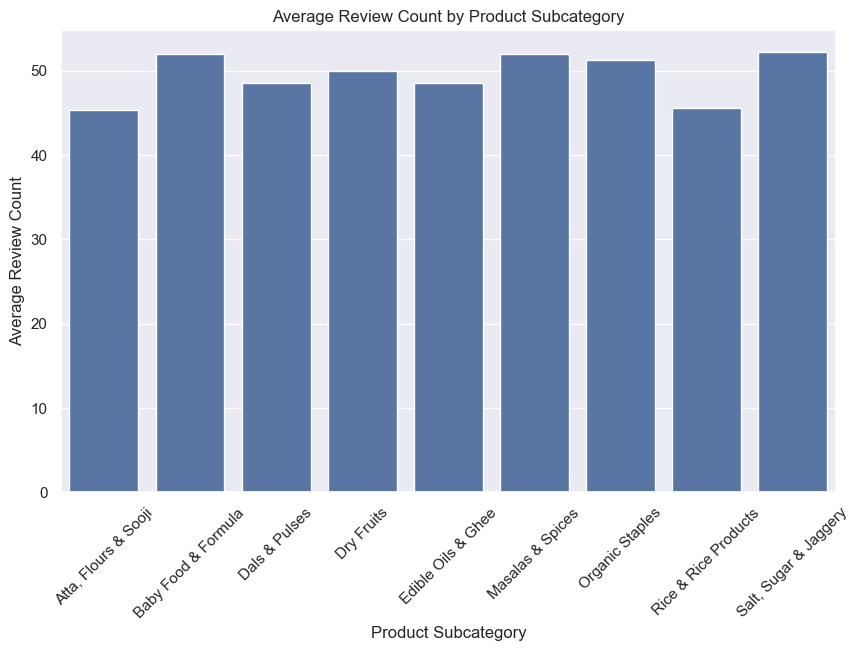

In [306]:
# Products which didn't have more than 100 review counts

average_review_count = df_FOM.groupby('product_subcategory')['customer_reviews_count'].mean()
sns.barplot(x=average_review_count.index, y=average_review_count.values)

# Average review count by product subcategory in the category 'Foodgrains, Oil & Masala'
plt.xlabel('Product Subcategory')
plt.ylabel('Average Review Count')
plt.title('Average Review Count by Product Subcategory')
plt.xticks(rotation=45)
plt.show()

#plotly

df_filtered = df_FOM
average_review_count = df_filtered.groupby('product_subcategory')['customer_reviews_count'].mean().reset_index()

fig = px.bar(average_review_count, x='product_subcategory', y='customer_reviews_count',
                title='Average Review Count by Product Subcategory', labels={'customer_reviews_count': 'Average Review Count'})
fig.update_xaxes(title='Product Subcategory', tickangle=45)
fig.update_yaxes(title='Average Review Count')
    

In [307]:
# Average review count by brand in the category 'Foodgrains, Oil & Masala'
average_review_count = df_filtered.groupby('brand')['customer_reviews_count'].mean().reset_index()

fig = px.bar(average_review_count, x='brand', y='customer_reviews_count',
                title='Average Review Count by Brand', labels={'customer_reviews_count': 'Average Review Count'})
fig.update_xaxes(title='Product Subcategory', tickangle=45)
fig.update_yaxes(title='Average Review Count')

Ratings

<Figure size 800x480 with 0 Axes>

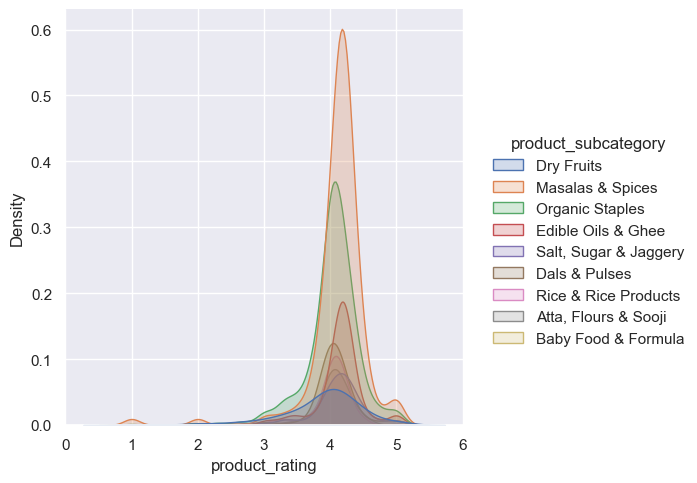

In [308]:
# density plot of product rating on the basis of subcategory in the category 'Foodgrains, Oil & Masala'
plt.figure(figsize=(10, 6), dpi=80)
sns.displot(df_FOM, x="product_rating", hue="product_subcategory", kind="kde", fill=True,warn_singular=False)

# IN EXCEL BY USING PIVOT TABLE WE CAN GET THE AVERAGE RATING OF EACH PRODUCT SUBCATEGORY


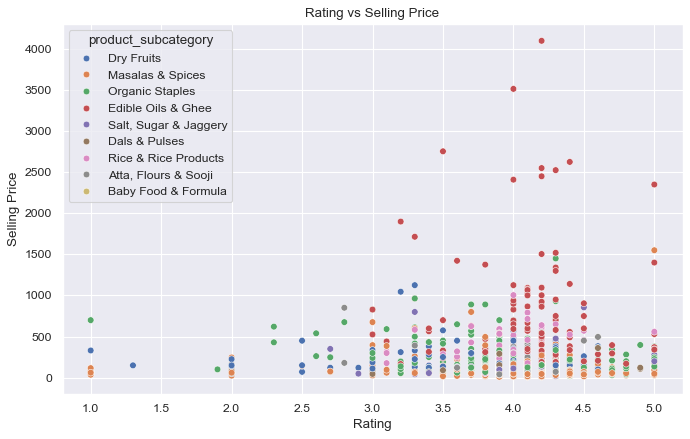

In [309]:
# scatter plot of rating vs selling price of products in the category 'Foodgrains, Oil & Masala'
plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(data=df_FOM, x='product_rating', y='selling_price', hue='product_subcategory')
plt.xlabel('Rating')
plt.ylabel('Selling Price')
plt.title('Rating vs Selling Price')
plt.show()


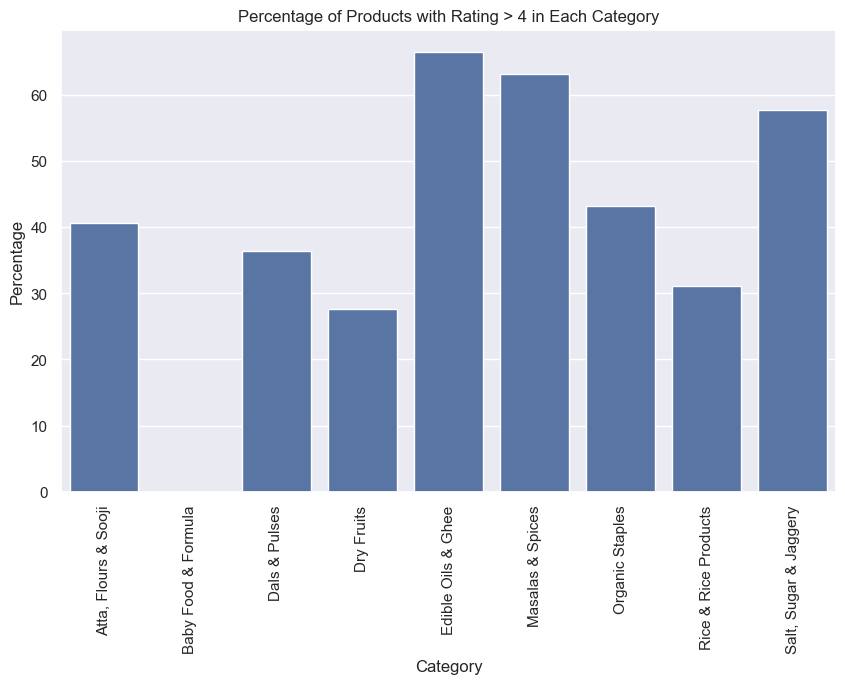

In [310]:
# Products with rating > 4 in each subcategory of the category 'Foodgrains, Oil & Masala'
products_count_per_product_subcategory = df_FOM['product_subcategory'].value_counts()
# Total products with rating > 4 in each category
products_with_more_than_4_reviews = df_FOM[df_FOM['product_rating'] > 4]['product_subcategory'].value_counts()
# Calculate percentage
percentage_per_product_subcategory = (products_with_more_than_4_reviews / products_count_per_product_subcategory) * 100

# Plotting the percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_per_product_subcategory.index, y=percentage_per_product_subcategory.values)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Products with Rating > 4 in Each Category')
plt.xticks(rotation=90)
plt.show()

Price

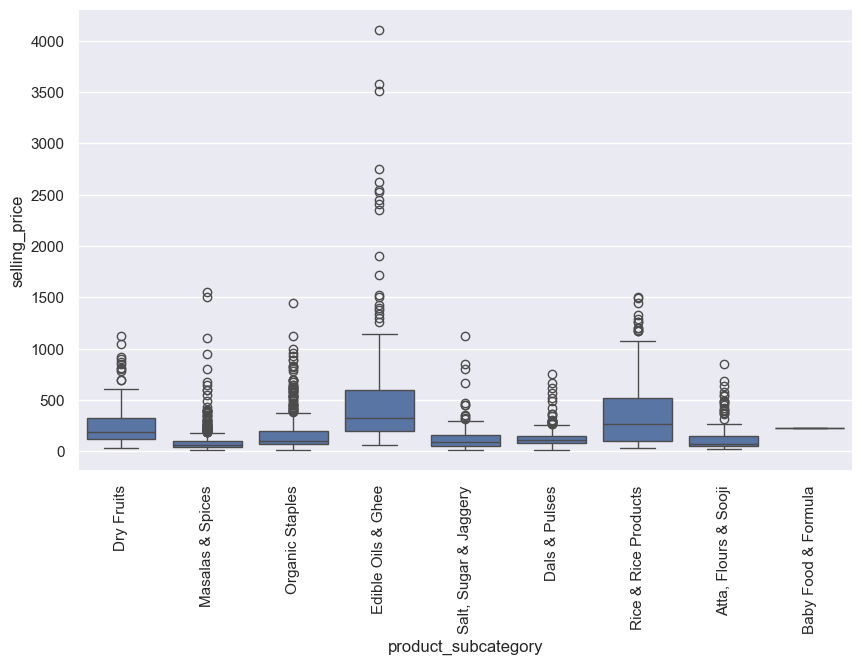

In [311]:
# box plot of selling price of products in each subcategory of the category 'Foodgrains, Oil & Masala'
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_subcategory', y='selling_price', data=df_FOM)
plt.xticks(rotation=90)
plt.show()


def generate_graph(category):
    # Filter the dataframe based on the selected category
    filtered_df = df[df['category'] == category]
    
    # Create the plotly figure
    fig = px.box(filtered_df, x='product_subcategory', y='selling_price')
    
    # Update the graph title
    fig.update_layout(title=f"Box Plot of Selling Price for {category}")
    
    # Show the figure
    fig.show()


## 2.Beauty & Hygiene

In [312]:
# data for the category 'Beauty & Hygiene' in a separate dataframe
df_filtered = df[df['category'] == "Beauty & Hygiene"]

# counting the number of products in each subcategory of the category 'Beauty & Hygiene'
average_review_count = df_filtered.groupby('product_subcategory')['customer_reviews_count'].sum().reset_index()


df_filtered['sales'] = df_filtered['selling_price'] * df_filtered['customer_reviews_count']
average_sale_by_volume = df_filtered.groupby('product_subcategory')['sales'].sum().reset_index()
# Plotting the pie chart for sales by volume for the category 'Beauty & Hygiene'
fig = px.pie(average_sale_by_volume, values='sales', names='product_subcategory', title=f'Sales by Volume for {"Beauty & Hygiene"}')
fig.update_layout(
    margin=dict(l=50, r=10, t=30, b=10)
    
)

fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23884\1037487470.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [313]:
# weighted average rating of each brand in the category ' beauty and hygiene'
df_FOM["weighted_rating"] = df_FOM["product_rating"] * df_FOM["customer_reviews_count"]
# Calculate the weighted average rating of each brand in the category 'Beauty & Hygiene' 
brand_ratings = df_FOM.groupby('brand').agg(total_weighted_rating=('weighted_rating', 'sum'),
                                    total_reviews=('customer_reviews_count', 'sum'))

brand_ratings['weighted_avg_rating'] = brand_ratings['total_weighted_rating'] / brand_ratings['total_reviews']
# Reset the index 
brand_ratings.reset_index(inplace=True)

print(brand_ratings)


                    brand  total_weighted_rating  total_reviews  \
0                18 Herbs                  671.3            221   
1               24 Mantra                16093.0           3999   
2    A.D.J Classic Choice                  516.3            124   
3                   AMADO                  240.0             83   
4                 AMAJAIN                    0.0             81   
..                    ...                    ...            ...   
230              bb Combo                    0.0           1337   
231            bb Popular                 6557.4           2826   
232              bb Royal                56974.9          26687   
233           ella Spices                  300.0            251   
234          mother dairy                  118.4             29   

     weighted_avg_rating  
0               3.037557  
1               4.024256  
2               4.163710  
3               2.891566  
4               0.000000  
..                   ...  
230   

In [315]:
import plotly.graph_objects as go
# calculating the discount percentage for each product
categories = df['category'].unique()

for cat in categories:
    if cat != "Fruits & Vegetables" and cat != "Eggs, Meat & Fish":
        data = df[df['category'] == str(cat)]
        sorted_data = data.sort_values(by='discount_per', ascending=False)
        top_10_brands = sorted_data['brand'].head(300)

        fig = go.Figure()
        fig.add_trace(go.Scatter(
            x=[i for i in sorted_data['product_rating'].head(300)],  # Rating values
            y=[brand for brand in top_10_brands],  # Brand names
            marker=dict(color="crimson", size=8),
            mode="markers",
            name="Top 100 Brands ratings on the basis of rating",
        ))

        fig.update_layout(
            title=cat,
            xaxis_title="Rating",
            yaxis_title="Brands",
        )

        fig.show()

## 3. Snacks & Branded Foods

In [316]:
# data for the category 'Snacks & Branded Foods' in a separate dataframe
df_SBF = df.loc[df['category'] == 'Snacks & Branded Foods'].copy()

<Axes: xlabel='product_subcategory', ylabel='count'>

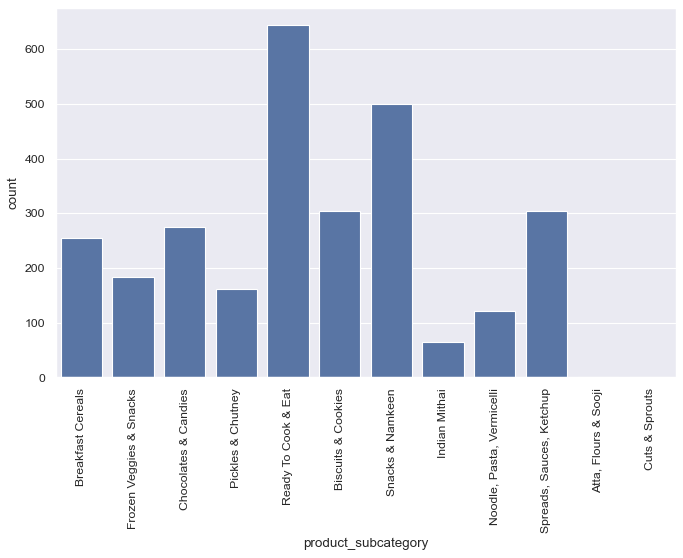

In [317]:
# counting the number of products in each subcategory of the category 'Snacks & Branded Foods'
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='product_subcategory', data=df_SBF)

<Figure size 800x480 with 0 Axes>

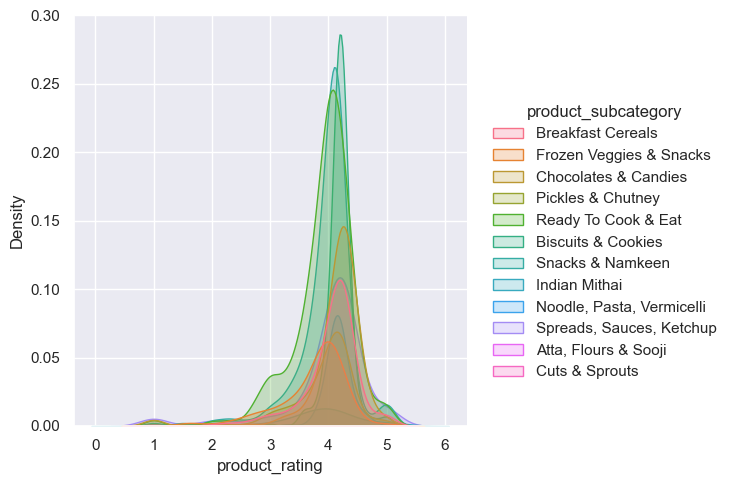

In [318]:
# Density plot of product rating on the basis of subcategory in the category 'Snacks & Branded Foods'
plt.figure(figsize=(10, 6), dpi=80)
sns.displot(df_SBF, x="product_rating", hue="product_subcategory", kind="kde", fill=True,warn_singular=False)

<Axes: xlabel='product_subcategory', ylabel='selling_price'>

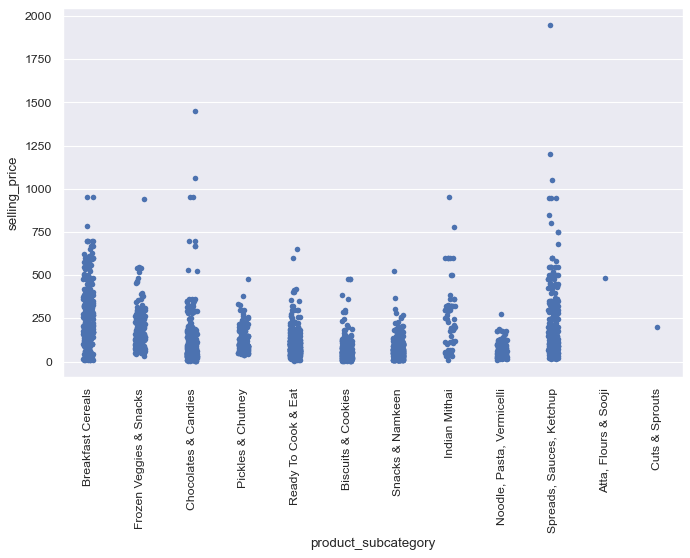

In [319]:
# strip plot of selling price of products against each subcategory of the category 'Snacks & Branded Foods'
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=90)
sns.stripplot(data=df_SBF, x="product_subcategory", y="selling_price")

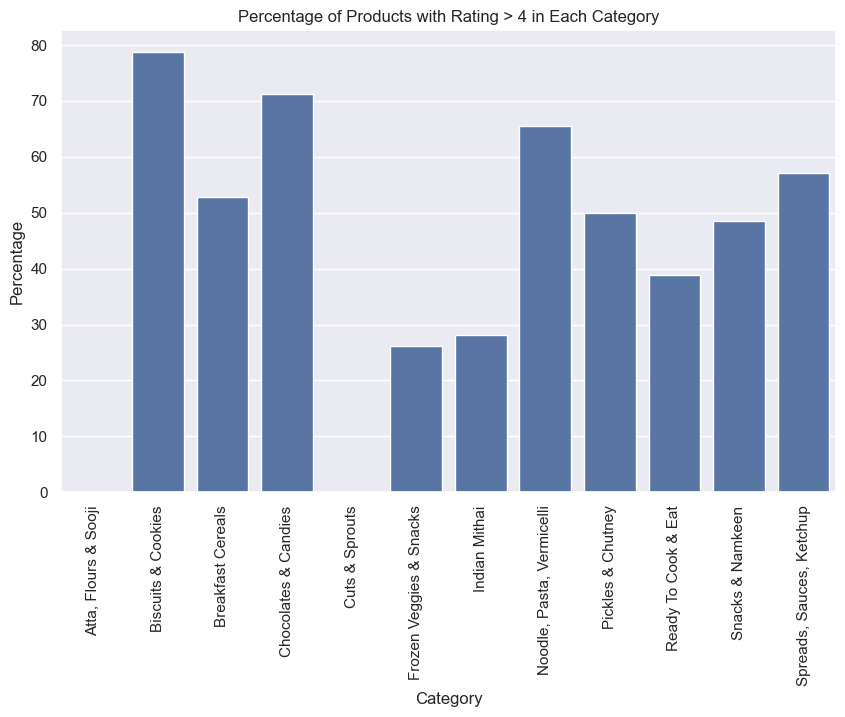

In [320]:
# bar plot of average review count by product subcategory in the category 'Snacks & Branded Foods' 
products_count_per_product_subcategory = df_SBF['product_subcategory'].value_counts()
# Total products with rating > 4 in each category
products_with_more_than_4_reviews = df_SBF[df_SBF['product_rating'] > 4]['product_subcategory'].value_counts()
# Calculate percentage
percentage_per_product_subcategory = (products_with_more_than_4_reviews / products_count_per_product_subcategory) * 100

# Plotting the percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_per_product_subcategory.index, y=percentage_per_product_subcategory.values)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Products with Rating > 4 in Each Category')
plt.xticks(rotation=90)
plt.show()

## 4. Kitchen, Garden & Pets

In [321]:
# data for the category 'Kitchen, Garden & Pets' in a separate dataframe
kgp=df[df['category']=='Kitchen, Garden & Pets']

<Axes: xlabel='product_subcategory', ylabel='count'>

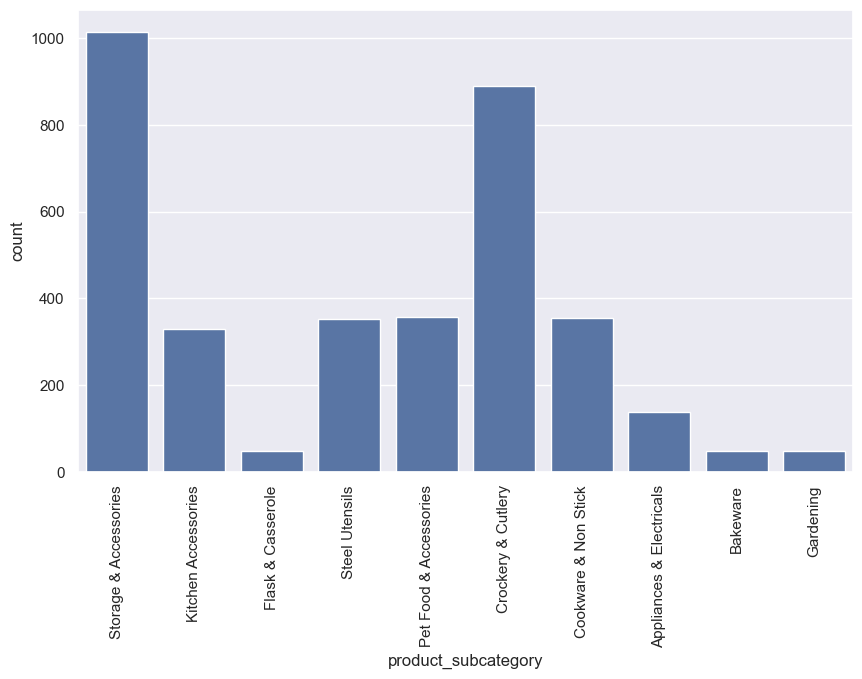

In [322]:
# counting the number of products in each subcategory of the category 'Kitchen, Garden & Pets'
sns.set_theme(rc={"figure.figsize": [10, 6]})
plt.xticks(rotation=90)
sns.countplot(x=kgp['product_subcategory'])

<Axes: xlabel='count', ylabel='product_type'>

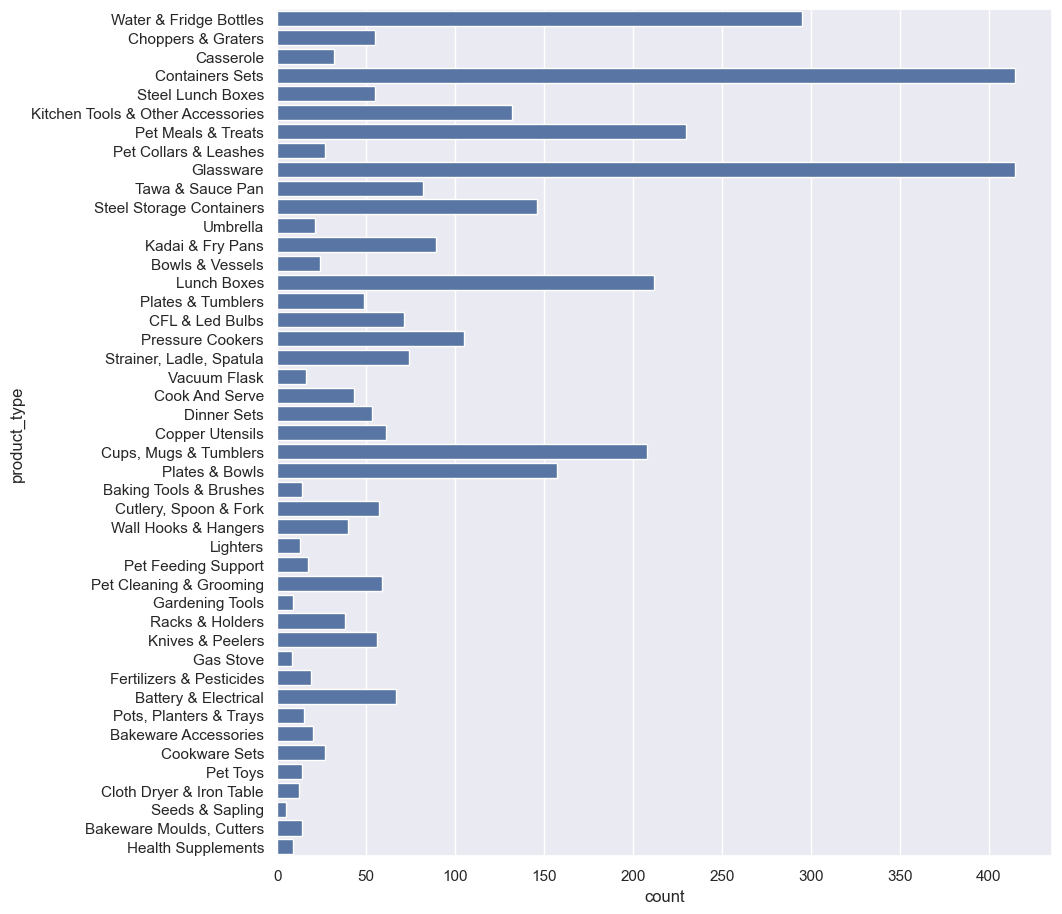

In [ ]:
# counting the number of products in each Product_type of the category 'Kitchen, Garden & Pets'

sns.set_theme(rc={"figure.figsize": [10, 11]})
sns.countplot(y=kgp['product_type'])

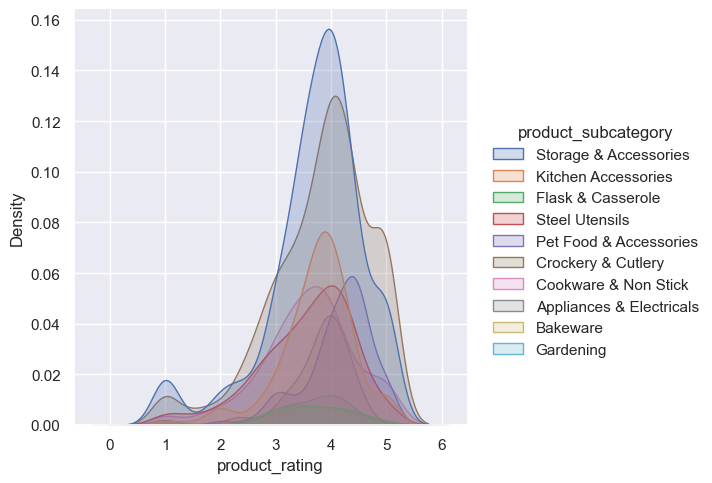

In [324]:
# Density plot of product rating on the basis of subcategory in the category 'Kitchen, Garden & Pets'

sns.set_theme(rc={"figure.figsize": [10, 6]})


sns.displot(kgp, x="product_rating", hue="product_subcategory", kind="kde", fill=True,warn_singular=False)

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='selling_price',  data=kgp, whis=[0.5, 99.5], y = "product_subcategory")

In [ ]:
plt.figure(figsize=(15, 16), dpi=80)
sns.boxplot(x='selling_price',  data=kgp, whis=[0.5, 99.5], y = "product_type")

## 5. Cleaning & Household

In [ ]:
# data for the category 'Kitchen, Garden & Pets' in a separate dataframe
cleaning_household = df.loc[df['category']=="Cleaning & Household"] 

In [326]:

cleaning_household.isnull().sum()

product_id                  0
product_title               0
category                    0
product_subcategory         0
brand                       1
selling_price               0
original_price              0
product_type                0
product_rating            575
product_description         0
availability_status         0
customer_reviews_count      0
seasonal_indicator          0
promotion_indicator         0
shipping_weight             0
bundle_indicator            0
customer_demographics       0
discount_per                0
sales                       0
dtype: int64

In [327]:
# remove the null values rows of column brand
cleaning_household = cleaning_household.dropna(subset=['brand'])

In [328]:
cleaning_household['brand'].isnull().sum()

0

<Axes: xlabel='product_subcategory', ylabel='selling_price'>

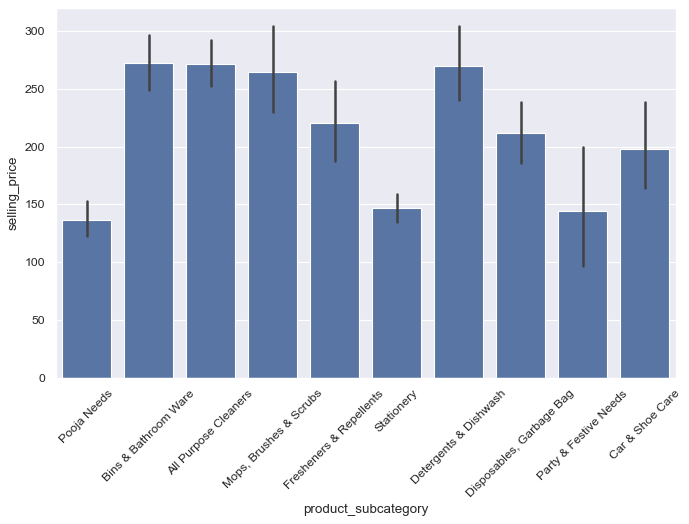

In [329]:
# create a graph using product subcategory and the selling price for the descriptive analysis using plotly
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=45)
sns.barplot(data= cleaning_household, x='product_subcategory', y='selling_price')

<Axes: xlabel='product_type', ylabel='count'>

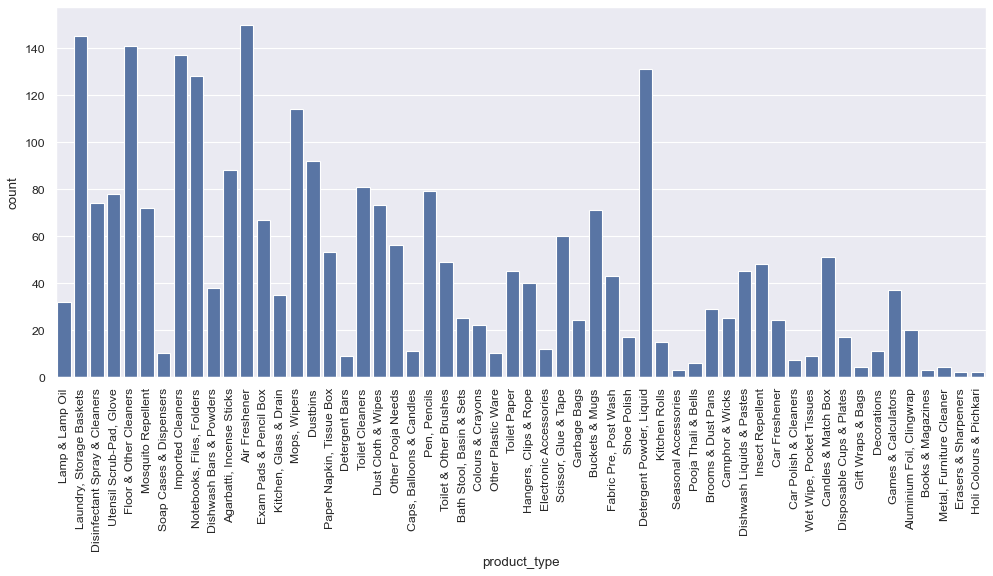

In [330]:
# use the seaborn library to create a graph of the product subcategory and the count of the product subcategory
plt.figure(figsize=(15, 6), dpi=80)
plt.xticks(rotation=90)
sns.countplot(data= cleaning_household, x='product_type')

<Axes: xlabel='product_type', ylabel='product_rating'>

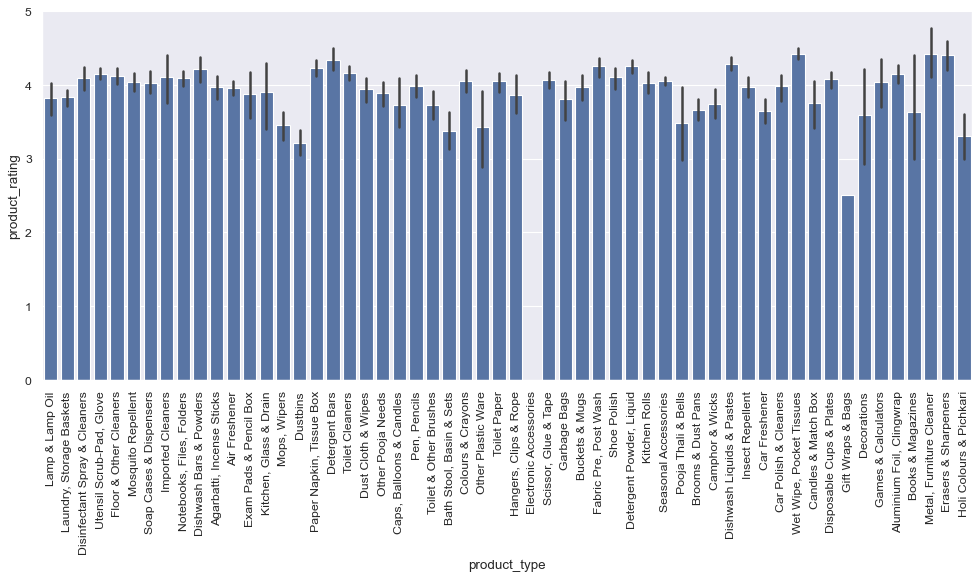

In [331]:
# average rating of the product_type using the seaborn library 
plt.figure(figsize=(15, 6), dpi=80)
plt.xticks(rotation=90)
sns.barplot(data= cleaning_household, x='product_type', y='product_rating')

<Axes: xlabel='selling_price', ylabel='product_subcategory'>

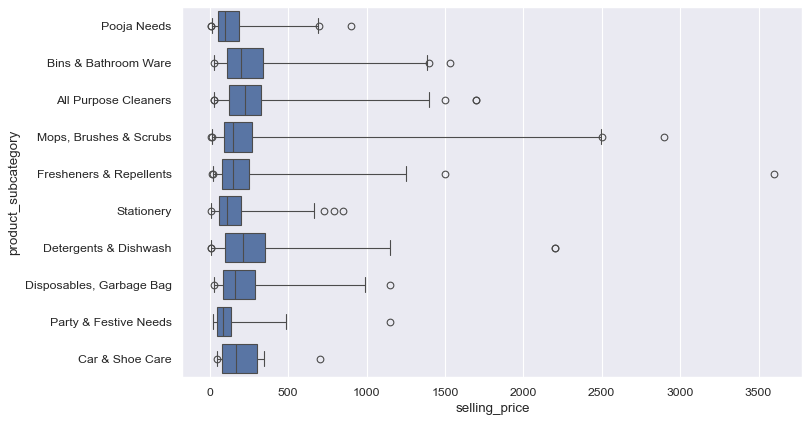

In [332]:
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='selling_price',  data=cleaning_household, whis=[0.5, 99.5], y = "product_subcategory")

<Axes: xlabel='selling_price', ylabel='product_type'>

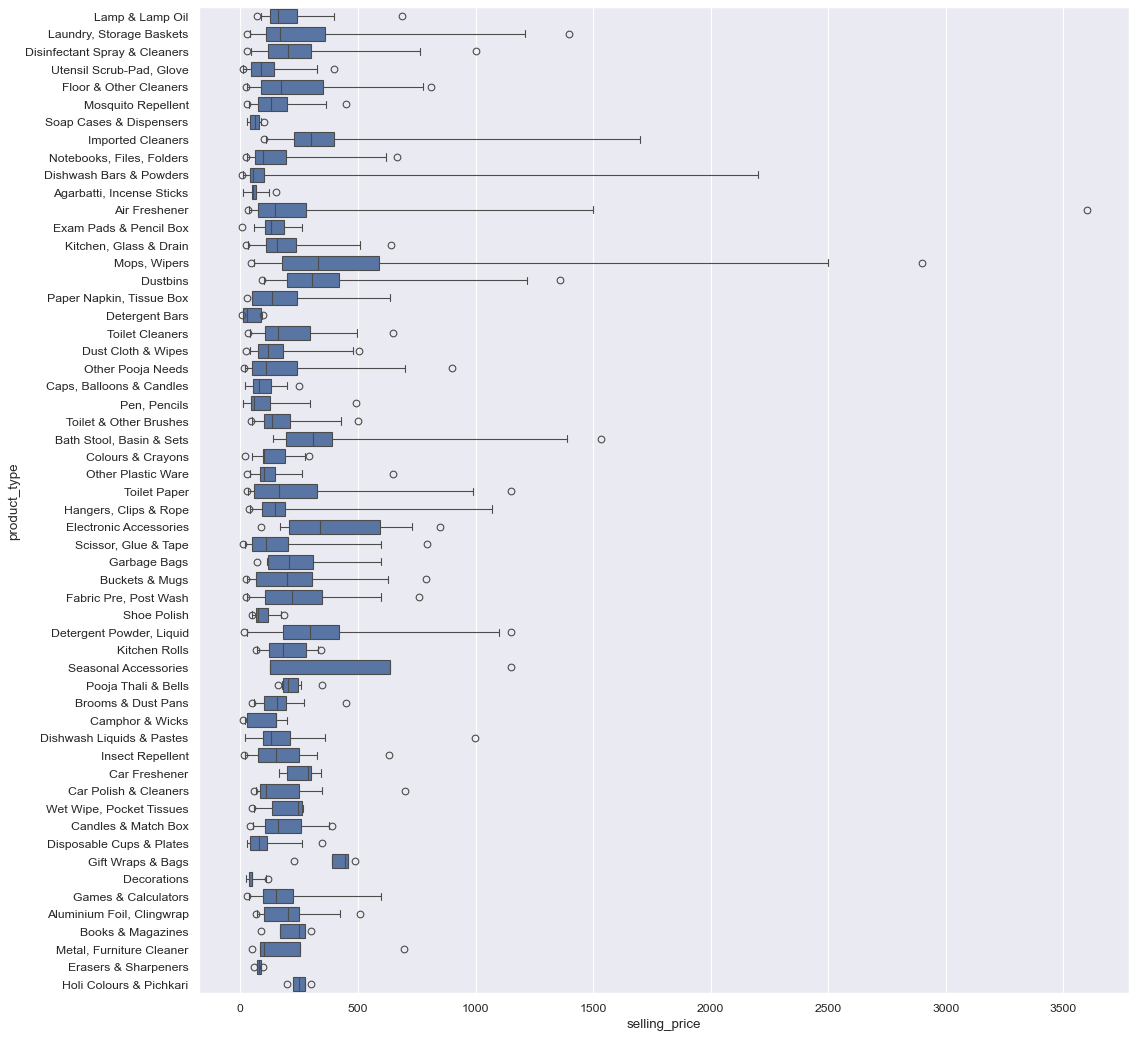

In [333]:
plt.figure(figsize=(15, 16), dpi=80)
sns.boxplot(x='selling_price',  data=cleaning_household, whis=[0.5, 99.5], y = "product_type")

<Axes: xlabel='product_type', ylabel='count'>

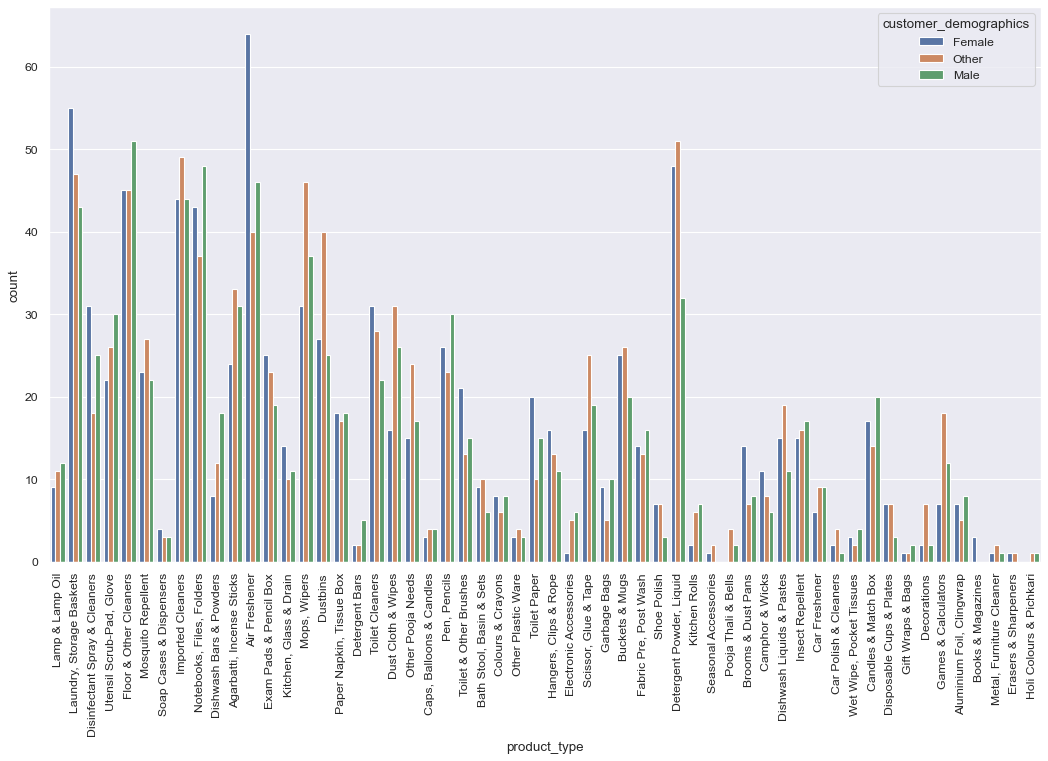

In [334]:
#plot the barplot using x as cutomer_demographics value counts and y as product_type
plt.figure(figsize=(16, 9), dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='product_type', hue='customer_demographics', data=cleaning_household)

<Axes: xlabel='product_type', ylabel='count'>

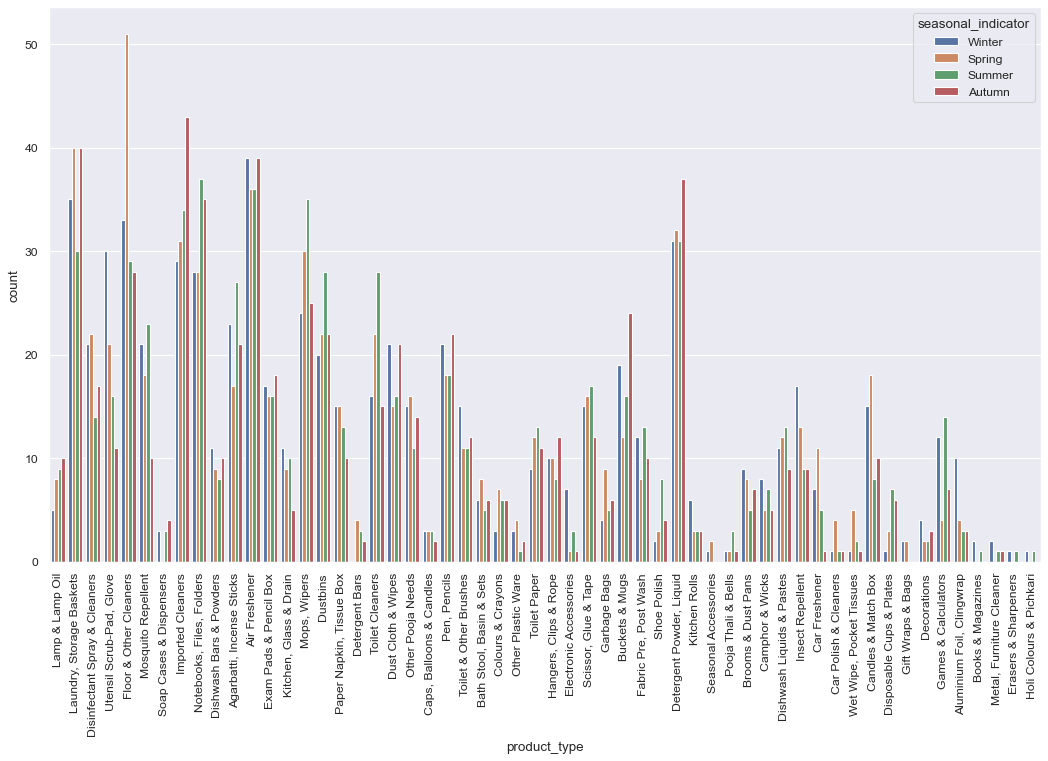

In [335]:
#plot the barplot using x as cutomer_demographics value counts and y as product_type
plt.figure(figsize=(16, 9), dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='product_type', hue='seasonal_indicator', data=cleaning_household)

<Axes: xlabel='product_type', ylabel='count'>

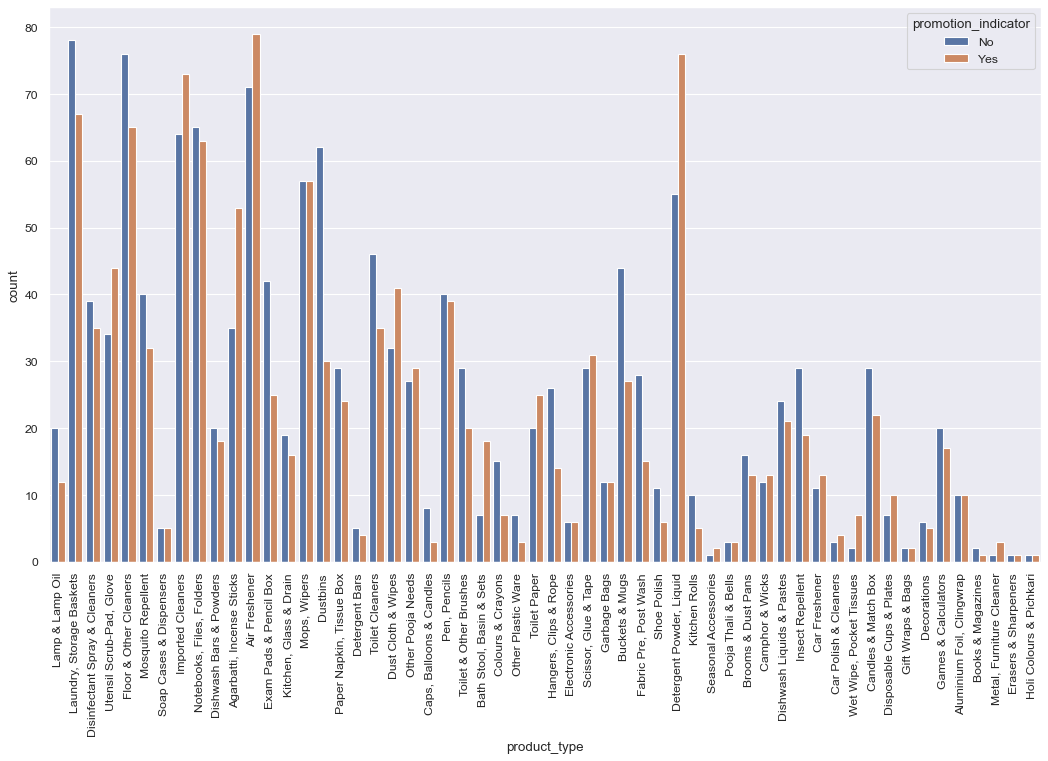

In [336]:
#plot the barplot using x as cutomer_demographics value counts and y as product_type
plt.figure(figsize=(16, 9), dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='product_type', hue='promotion_indicator', data=cleaning_household)

In [337]:
fig = px.bar(cleaning_household, 
            #  x='product_type', 
             x = 'brand',
             y='customer_reviews_count', 
             color='promotion_indicator', 
             barmode='group',  # Grouped bars for each product_subcategory
             title='Bar Chart of Customer Reviews by Product Subcategory and Brand')

fig.update_xaxes(title='Brand')
fig.update_yaxes(title='Total Customer Reviews')

fig.update_layout(width=800, height=600)
fig.show()

In [338]:
fig = px.scatter(cleaning_household, x='discount_per', y='product_rating', 
                 size='customer_reviews_count', color='promotion_indicator', 
                 title='Scatter Plot of Customer Reviews by Promotion Indicator')

fig.update_layout(width=800, height=600)
fig.show()

In [339]:
fig = px.scatter(cleaning_household, x='discount_per', y='product_rating', 
                 size='customer_reviews_count', color='product_subcategory', 
                 title='Scatter plot of discount % and product rating with customer reviews count')

fig.update_layout(width=800, height=600)
fig.show()

In [340]:
fig = px.scatter(cleaning_household, x='original_price', y='selling_price', 
                 size='customer_reviews_count', color='product_type', 
                 title='selling price vs original price with selling price on the basis of product type')

fig.update_layout(width=1200, height=600)
fig.update_xaxes(title_text='Original Price')
fig.update_yaxes(title_text='Selling Price')
fig.show()

In [341]:

fig = px.scatter(cleaning_household, x="selling_price", y="product_rating", color="category", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.update_layout(width=1200, height=800)



In [342]:
fig = px.sunburst(cleaning_household, path=['product_subcategory', "product_type", "brand", "product_title"], values='customer_reviews_count', color='product_subcategory')
fig.update_layout(width=800, height=600)
fig.show()

## 6. Gourmet & World Food

In [343]:
gwf = df.loc[df['category']=="Gourmet & World Food"] 

In [344]:
# replace the null value with the mode value of the column
gwf['product_rating'].fillna(gwf['product_rating'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23884\2177648608.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\HP\AppData\Local\Temp\ipykernel_23884\2177648608.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='product_subcategory', ylabel='selling_price'>

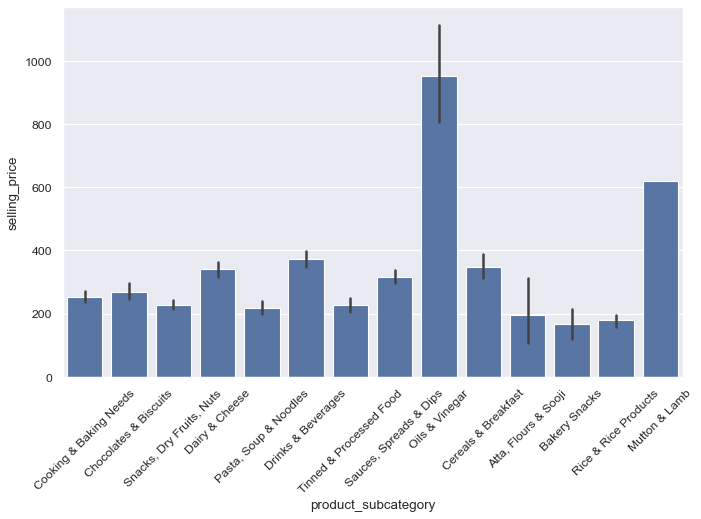

In [345]:
# create a graph using product subcategory and the selling price for the descriptive analysis using plotly
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=45)
sns.barplot(data= gwf, x='product_subcategory', y='selling_price')

<Axes: xlabel='product_type', ylabel='count'>

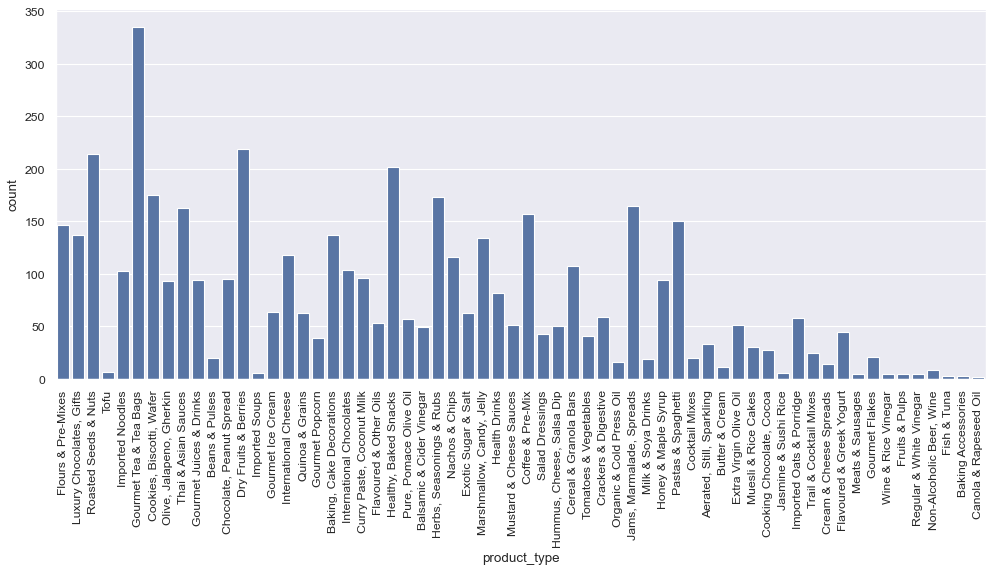

In [346]:
# use the seaborn library to create a graph of the product subcategory and the count of the product subcategory
plt.figure(figsize=(15, 6), dpi=80)
plt.xticks(rotation=90)
sns.countplot(data= gwf, x='product_type')

<Axes: xlabel='product_type', ylabel='product_rating'>

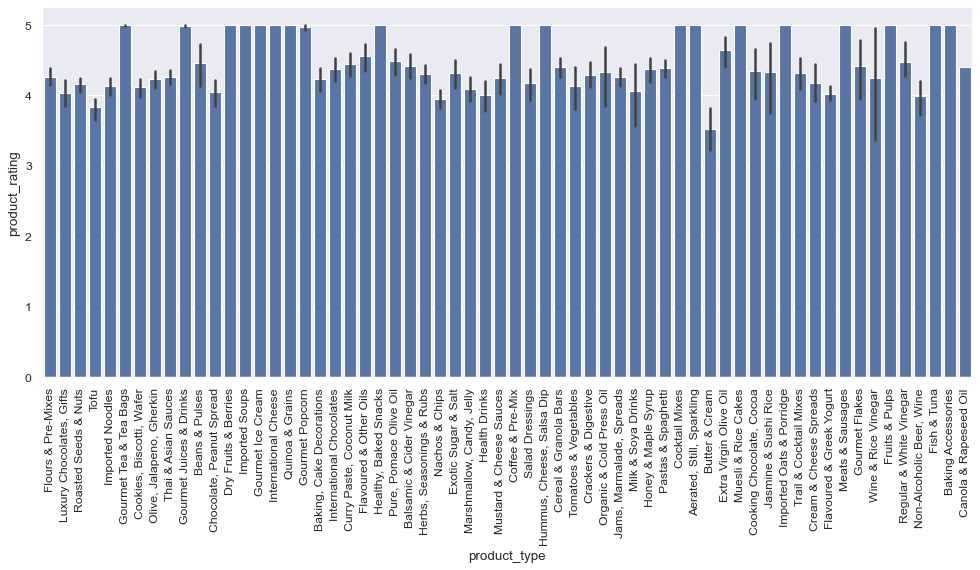

In [347]:
# average rating of the product_type using the seaborn library 
plt.figure(figsize=(15, 6), dpi=80)
plt.xticks(rotation=90)
sns.barplot(data= gwf, x='product_type', y='product_rating')

<Axes: xlabel='selling_price', ylabel='product_subcategory'>

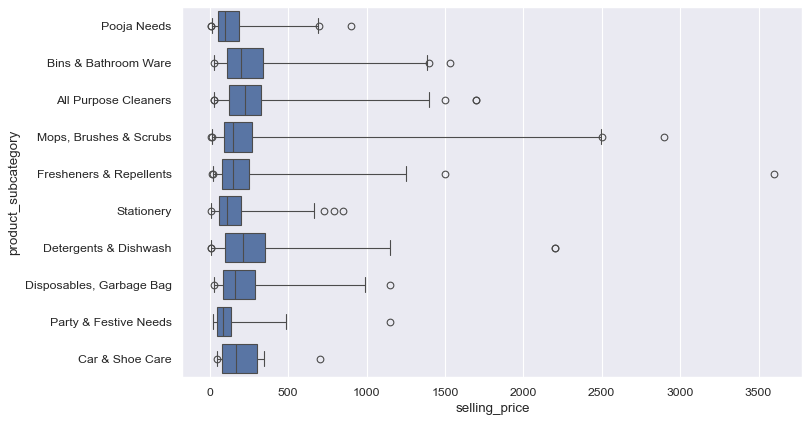

In [348]:
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(x='selling_price',  data=cleaning_household, whis=[0.5, 99.5], y = "product_subcategory")

<Axes: xlabel='selling_price', ylabel='product_type'>

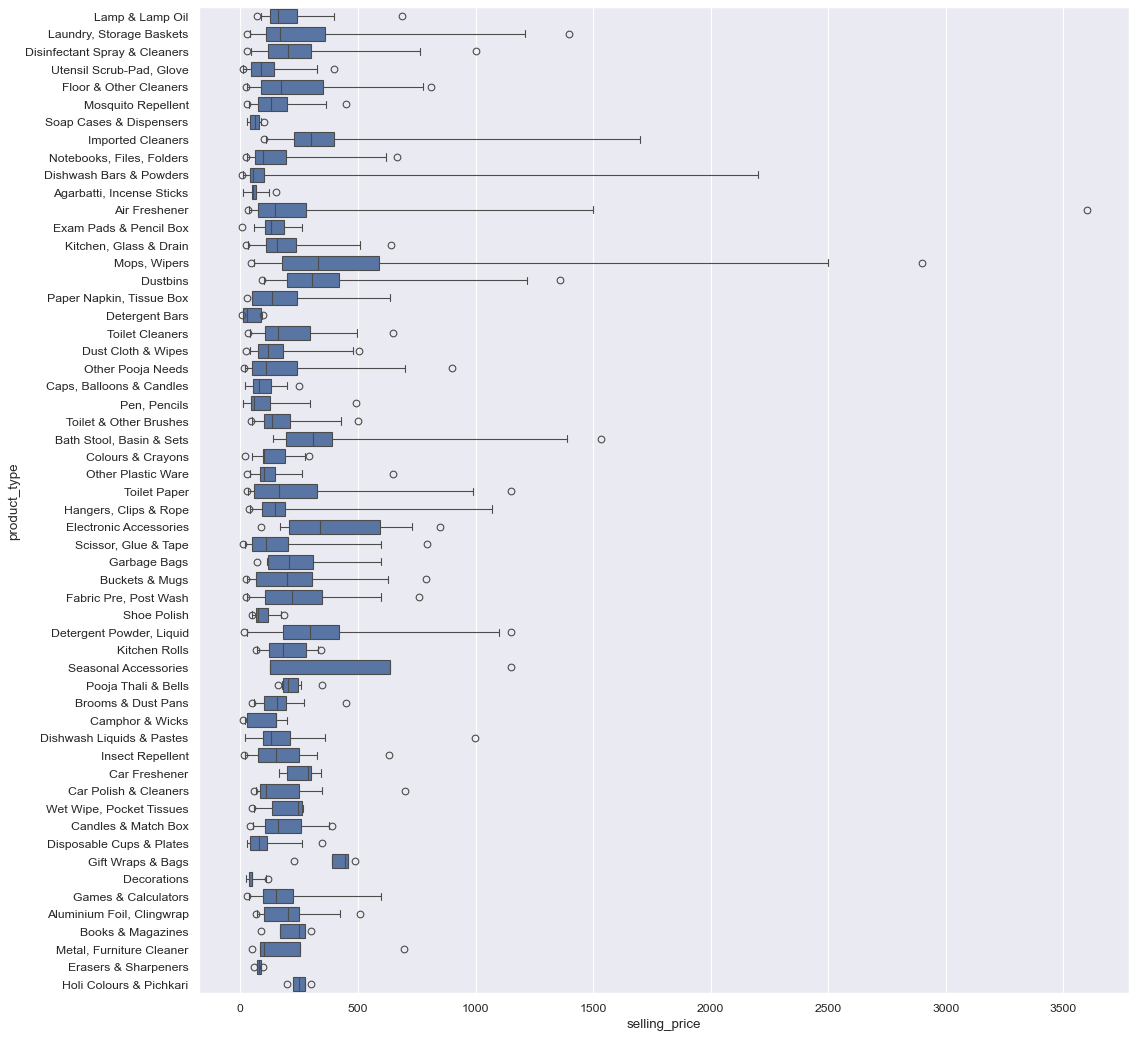

In [349]:
plt.figure(figsize=(15, 16), dpi=80)
sns.boxplot(x='selling_price',  data=cleaning_household, whis=[0.5, 99.5], y = "product_type")

<Axes: xlabel='product_type', ylabel='count'>

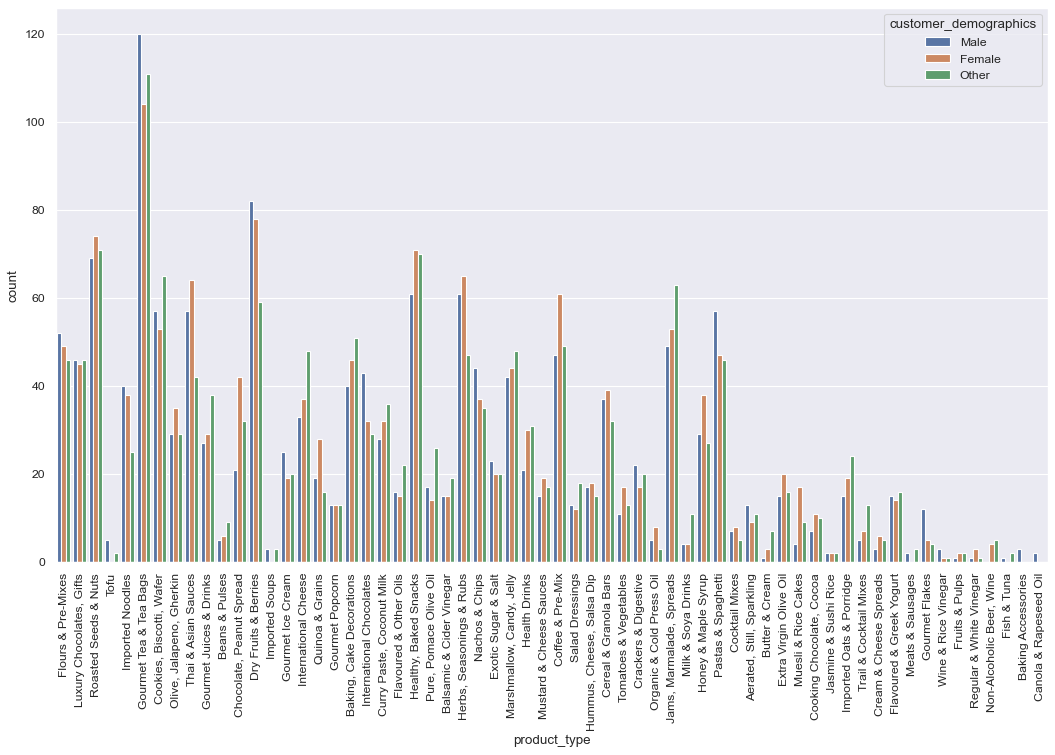

In [350]:
#plot the barplot using x as cutomer_demographics value counts and y as product_type
plt.figure(figsize=(16, 9), dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='product_type', hue='customer_demographics', data=gwf)


<Axes: xlabel='product_type', ylabel='count'>

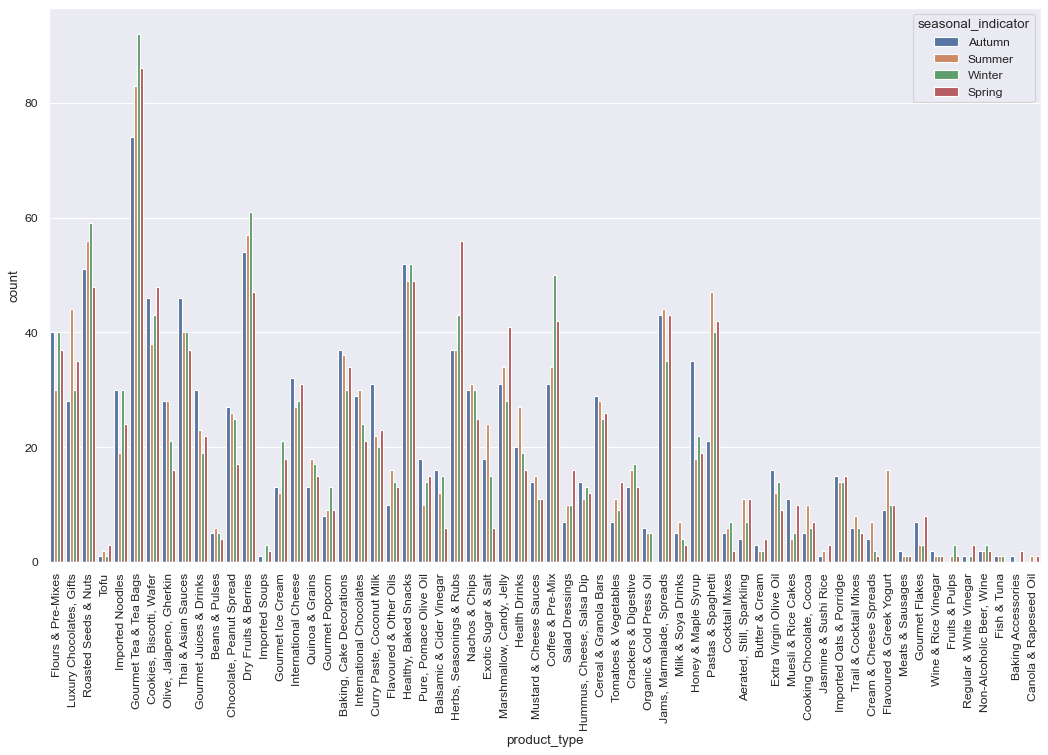

In [351]:
#plot the barplot using x as cutomer_demographics value counts and y as product_type
plt.figure(figsize=(16, 9), dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='product_type', hue='seasonal_indicator', data=gwf)

<Axes: xlabel='product_type', ylabel='count'>

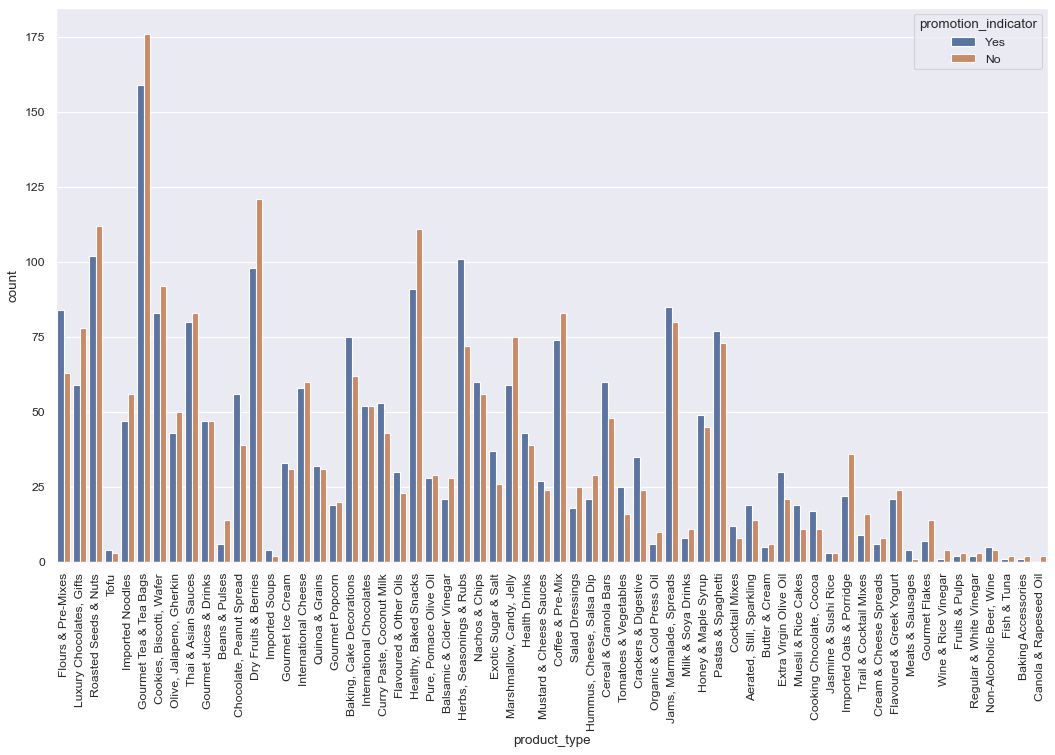

In [352]:
#plot the barplot using x as cutomer_demographics value counts and y as product_type
plt.figure(figsize=(16, 9), dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='product_type', hue='promotion_indicator', data=gwf)